### Based on the paper "On Random Graphs 1" by Erods and Renyi

https://github.com/harshnova/Complex-Models/blob/master/On-Random-Graphs-1.pdf

Random graph >> A graph which has nodes and egdes generated at random. There are many processes that can generate random graphs.

Connected graph >> A undirected graph is called connected if there is a path from every node to every other node.

Complete graph >> A graph where each node is connected directly to all other nodes.

### Erdos-Renyi (ER) graph

These are random graphs which are characterized by (n,p) where n is the number of nodes and p is the probability that an edge exists between any two nodes. Properties of random graphs abruptly change when there is an addition of a random edge. One such very important property is connectivity.

The probability of an ER graph to be connected is very low if p is low and close to 1 if p is high. Between these two values of p, there is a critical value p = pcrit where there is a rapid transition in the probability of graph being connected. Here,

pcrit = ln(n)/n

A random graph G(n,p) has hardly any probability of being connected if p < pcrit and high probability of being connected if p >= pcrit

Let us start by creating a complete graph.

In [122]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def build_complete_graph(n):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i+1)
        for j in range(1,i+1):
            if(not(G.has_edge(i+1, j))):
                G.add_edge(i+1, j)
    return(G)

In [4]:
complete_graph = build_complete_graph(10)

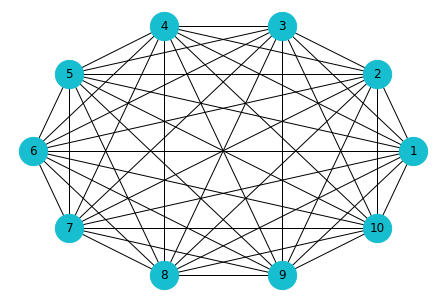

In [6]:
nx.draw_circular(complete_graph, node_color = 'C9', node_size = 800, with_labels = True)

A simple method to check if a graph is connected:
Start at any node and check if we can reach all other nodes. First, check all the neighbors of node selected, and then check neighbors of neighbors, and so on, until all other nodes are seen.

For example, neighbors of node 1 in the graph above:

In [7]:
list(complete_graph.neighbors(1))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

Let us create a method which will take graph and determine if is it connected.

In [8]:
def getAllReachables(graph, node):
    reachables = set()
    stack = [node]
    while(stack):
        node = stack.pop()
        if(node not in reachables):
            reachables.add(node)
            stack.extend(graph.neighbors(node))
    return(list(reachables))

def isConnected(graph):
    connection_status = {}
    all_nodes = list(graph.nodes())
    for node in all_nodes:
        connection_status[node]=False
        reachable = getAllReachables(graph, node)
        if(reachable == all_nodes):
            connection_status[node]=True
    return(not(False in connection_status.values()))

In [9]:
print(isConnected(complete_graph))

True


### Generating an ER Graph

In [10]:
def build_random_graph(n, p):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i+1)
        for j in range(1,i+1):
            if(not(G.has_edge(i+1, j))):
                if(p > np.random.random()):
                    G.add_edge(i+1, j)
    return(G)

In [29]:
er_graph = build_random_graph(10, 0.3)

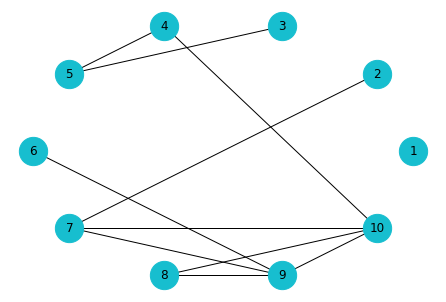

In [30]:
nx.draw_circular(er_graph, node_color = 'C9', node_size = 800, with_labels = True)

Let us check if this ER graph is connected

In [31]:
print(isConnected(er_graph))

False


Let us find the probability of connectivity.
For this, we will create the graph for a large number of times and take average of how many times this random graph is connected.

In [32]:
def getConnectivityProbability(n,p):
    i = 10000
    connectivity_stats = []
    for j in range(i):
        er_graph = build_random_graph(n,p)
        if(isConnected(er_graph)):
            connectivity_stats.append(1)
    return(np.sum(connectivity_stats)/(i*1.0))

In [33]:
print(getConnectivityProbability(10,0.3))

0.6519


We will now observe the pattern between the edge probability and probability of connectivity.

In [ ]:
x = np.linspace(0.0, 1.0, num=1000)
y = []
for p in x:
    y.append(getConnectivityProbability(10, p))

The critical probability is pcrit = ln(n)/n

In [64]:
pcrit = np.log(10)/10
print(pcrit)

0.23025850929940458


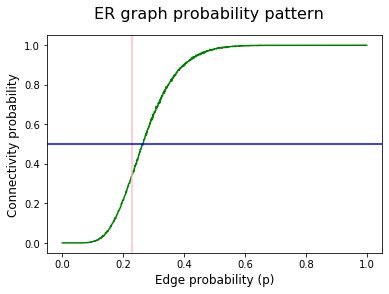

In [98]:
fig = plt.figure()
plt.plot(x,y, color='green')
fig.suptitle('ER graph probability pattern', fontsize=16)
plt.xlabel('Edge probability (p)', fontsize=12)
plt.ylabel('Connectivity probability', fontsize=12)
plt.axvline(pcrit, color='pink')
plt.axhline(0.5, color='blue')

### Second kind of ER Graph

There is second kind of ER graph which is characterized by (n,m) in contrast to the first type which was characterized by (n,p). Here, m is the total count of edges and the location of edges is random.

Let us build the second kind of ER graph with same number of edges in the first ER graph.

In [37]:
def build_random_graph_second_type(n, m):
    G = nx.Graph()
    edges = []
    for i in range(n):
        G.add_node(i+1)
        for j in range(1,i+1):
            if(not([i+1, j] in  edges)):
                edges.append([i+1, j])
    random.shuffle(edges)
    edges = edges[0:m]
    for edge in edges:
        first_end = edge[0]
        second_end = edge[1]
        G.add_edge(first_end, second_end)
    return(G)

In [38]:
er2_graph = build_random_graph_second_type(10, er_graph.number_of_edges())

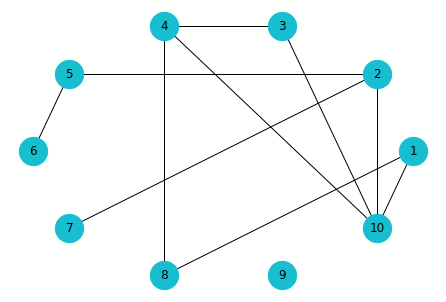

In [39]:
nx.draw_circular(er2_graph, node_color = 'C9', node_size = 800, with_labels = True)

Let us find the probability of connectivity for this second graph.
For this, we will create the graph for a large number of times and take average of how many times this random graph is connected.

In [40]:
def getConnectivityProbabilitySecond(n,m):
    i = 10000
    connectivity_stats = []
    for j in range(i):
        er2_graph = build_random_graph_second_type(n,m)
        if(isConnected(er2_graph)):
            connectivity_stats.append(1)
    return(np.sum(connectivity_stats)/(i*1.0))

In [41]:
print(getConnectivityProbabilitySecond(10, 10))

0.2724


We will now observe the pattern between the edge probability and probability of connectivity.

In [42]:
max_edges = complete_graph.number_of_edges()

In [46]:
x2 = np.linspace(0, max_edges, num=max_edges)
y2 = []
for m in x2:
    y2.append(getConnectivityProbabilitySecond(10, int(m)))

Text(0, 0.5, 'Connectivity probability')

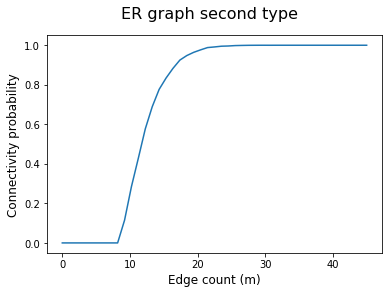

In [101]:
fig = plt.figure()
plt.plot(x2,y2)
fig.suptitle('ER graph second type', fontsize=16)
plt.xlabel('Edge count (m)', fontsize=12)
plt.ylabel('Connectivity probability', fontsize=12)

Converting edge count (m) into probability (p) as p = m/max_edges and transforming the above plot into probability domain from count domain.

In [48]:
x2_p = x2/max_edges

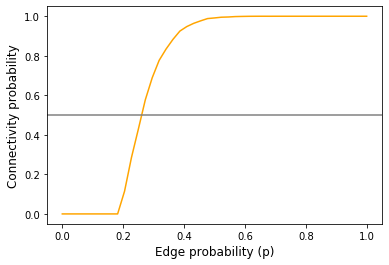

In [103]:
plt.plot(x2_p, y2, color = 'orange')
fig.suptitle('ER graph second type', fontsize=16)
plt.xlabel('Edge probability (p)', fontsize=12)
plt.ylabel('Connectivity probability', fontsize=12)
plt.axhline(0.5, color='gray')

Comparing the two plots, generated using the edge probability based ER graph and edge probability transformed edge count based ER graph. 

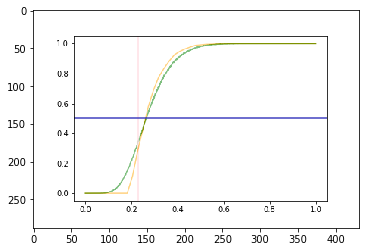

In [121]:
# PIL code for overlaying two images

We observe their pattern is nearly same at connectivity probability = 0.5